In [116]:
# Adapted from CS51 2.2 materials
# Import useful packages
import pandas
pandas.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# import and print data
# data = pandas.read_csv("soil_observations.csv") # requires file to be loaded in the directory
data = pandas.read_csv("student-mat.csv", sep=";")

# transform binary values to 1 and 0
data['higher'] = data['higher'].map({'yes': 1, 'no': 0})


In [117]:
# Adapted from CS51 2.2 materials
def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # If there is only one predictor variable, plot the regression line
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')

    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]

    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot - Not needed in this case
    #plt.figure()
    #residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green', line_kws={"x_jitter": 1, "y_jitter": 1})
    #residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    #residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    

    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

4.829732475973559
4.493422406116086


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     13.53
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           0.000267
Time:                        23:33:55   Log-Likelihood:                -1154.5
No. Observations:                 395   AIC:                             2313.
Df Residuals:                     393   BIC:                             2321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8000      1.009      6.743      0.000       4.817       8.783
higher         3.8080      1.035      3.679      0.000       1.773       5.843
==============================================================================
Omnibus:                       32.148   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.610
Skew:                          -0.730   Prob(JB):                     6.81e-09
Kurtosis:                       3.395   Cond. No.                         8.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

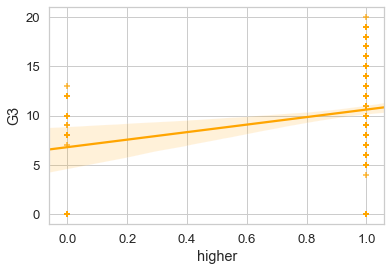

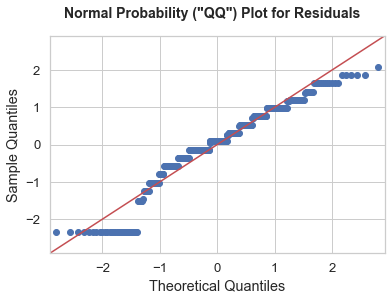

In [118]:
mult_regression(['higher'],'G3')

# Standard deviations for checking constant variability of residuals
print(data['G3'][data['higher'] == 0].std())
print(data['G3'][data['higher'] == 1].std())
regressionmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     9.060
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           2.00e-14
Time:                        21:57:13   Log-Likelihood:                -1115.5
No. Observations:                 395   AIC:                             2255.
Df Residuals:                     383   BIC:                             2303.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7340      3.469      3.959      0.000       6.913      20.555
higher         1.1981      1.025      1.169      0.243      -0.818       3.214
freetime       0.3736      0.221      1.689      0.092      -0.061       0.809
goout         -0.5055      0.199     -2.543      0.011      -0.896      -0.115
absences       0.0526      0.027      1.934      0.054      -0.001       0.106
Medu           0.5873      0.205      2.863      0.004       0.184       0.991
age           -0.3024      0.184     -1.643      0.101      -0.664       0.060
studytime      0.3567      0.261      1.365      0.173      -0.157       0.871
failures      -1.6702      0.311     -5.373      0.000      -2.281      -1.059
famsup        -0.9342      0.445     -2.101      0.036      -1.808      -0.060
schoolsup     -1.4518      0.651     -2.229      0.026      -2.732      -0.171
romantic      -1.1001      0.456     -2.411      0.016      -1.997      -0.203
==============================================================================
Omnibus:                       34.678   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.276
Skew:                          -0.752   Prob(JB):                     1.09e-09
Kurtosis:                       3.496   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

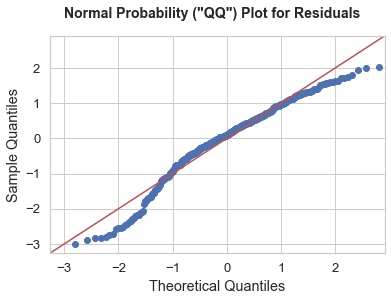

In [94]:
mult_regression(['higher', 'freetime', 'goout', 'absences', 'Medu',
                 'age', 'studytime', 'failures', 'famsup', 'schoolsup', 'romantic'],'G3')
regressionmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     906.1
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          1.01e-147
Time:                        22:20:17   Log-Likelihood:                -820.11
No. Observations:                 395   AIC:                             1646.
Df Residuals:                     392   BIC:                             1658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8300      0.335     -5.458      0.000      -2.489      -1.171
G1             0.1533      0.056      2.728      0.007       0.043       0.264
G2             0.9869      0.050     19.909      0.000       0.889       1.084
==============================================================================
Omnibus:                      242.253   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1710.927
Skew:                          -2.644   Prob(JB):                         0.00
Kurtosis:                      11.718   Cond. No.                         55.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

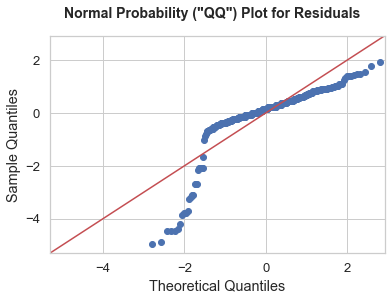

In [115]:
mult_regression(['G1', 'G2'],'G3')
regressionmodel.summary()

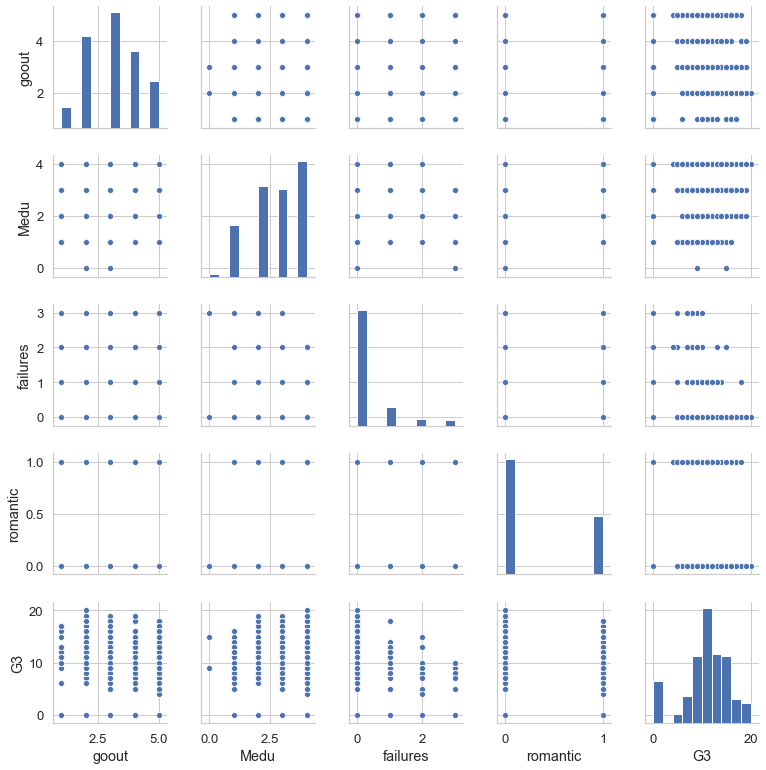

In [110]:
column_x = ['goout', 'Medu',
                'failures', 'romantic']
column_y = 'G3'
columnstoplot = column_x + [column_y]

sns.pairplot(data[columnstoplot], x_vars=columnstoplot, y_vars=columnstoplot, height=2.2);